<a href="https://colab.research.google.com/github/Sanku1234/abhishek/blob/main/3a_Linearregression_MLlab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Experiment Number 3a.
## AIM:- Student Performance Prediction using Linear Regression.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import shapiro, norm
from statsmodels.stats.stattools import durbin_watson

In [3]:
# 1. Dataset
data = {
    "Hours Studied": [2, 3, 5, 6, 8, 9],
    "Exam Score": [55, 60, 65, 70, 80, 85]
}
df = pd.DataFrame(data)
print("Dataset:\n", df)

Dataset:
    Hours Studied  Exam Score
0              2          55
1              3          60
2              5          65
3              6          70
4              8          80
5              9          85


In [4]:
# 2. Fit Linear Regression

X = df[["Hours Studied"]]  # independent variable
y = df["Exam Score"]       # dependent variable

model = LinearRegression()
model.fit(X, y)

# Slope and Intercept
slope = model.coef_[0]
intercept = model.intercept_
print(f"\nLinear Regression Equation: y = {slope:.2f}x + {intercept:.2f}")


Linear Regression Equation: y = 4.20x + 46.07


In [5]:
# 3. Predict exam score for 7 hours

predicted_score = model.predict([[7]])[0]
print(f"Predicted score for 7 hours: {predicted_score:.2f}")

Predicted score for 7 hours: 75.47


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [6]:
# 4. Calculate residuals (errors)

df["Predicted"] = model.predict(X)
df["Residuals"] = df["Exam Score"] - df["Predicted"]

print("\nResiduals:\n", df[["Hours Studied", "Exam Score", "Predicted", "Residuals"]])


Residuals:
    Hours Studied  Exam Score  Predicted  Residuals
0              2          55  54.466667   0.533333
1              3          60  58.666667   1.333333
2              5          65  67.066667  -2.066667
3              6          70  71.266667  -1.266667
4              8          80  79.666667   0.333333
5              9          85  83.866667   1.133333


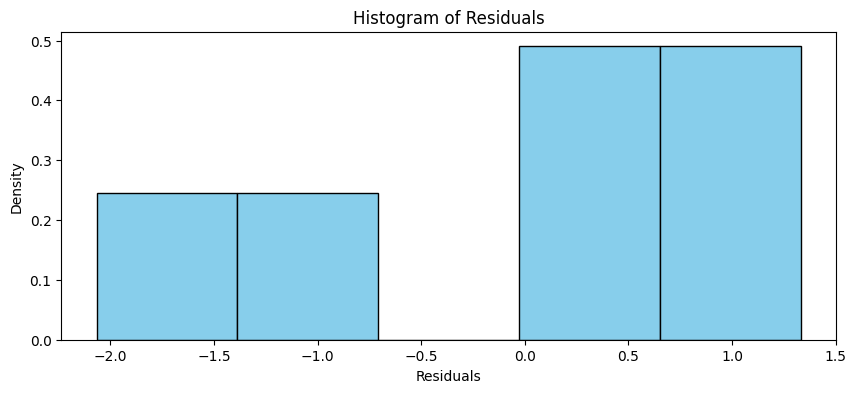

In [19]:
# 5. Plot residuals

plt.figure(figsize=(10,4))

# Histogram of residuals
plt.hist(df["Residuals"], bins=5, color='skyblue', edgecolor='black', density=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.show()


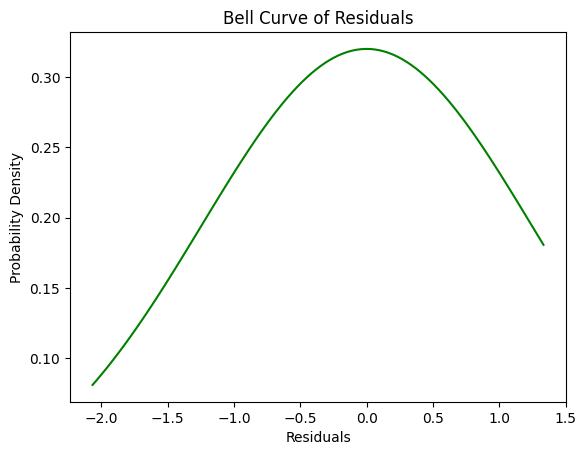

In [16]:

# Bell-shaped curve (PDF of residuals)
mu, std = np.mean(df["Residuals"]), np.std(df["Residuals"])
x_vals = np.linspace(min(df["Residuals"]), max(df["Residuals"]), 100)
p_vals = norm.pdf(x_vals, mu, std)

plt.plot(x_vals, p_vals, color='green')
plt.title("Bell Curve of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Probability Density")
plt.show()

In [8]:
# 6. Shapiro-Wilk Test for normality

shapiro_stat, shapiro_p = shapiro(df["Residuals"])
print(f"\nShapiro-Wilk Test: Statistic={shapiro_stat:.4f}, p-value={shapiro_p:.4f}")

if shapiro_p > 0.05:
    print("Residuals are normally distributed (p > 0.05).")
else:
    print("Residuals are NOT normally distributed (p <= 0.05).")


Shapiro-Wilk Test: Statistic=0.8871, p-value=0.3034
Residuals are normally distributed (p > 0.05).


In [9]:
# 7. Durbin-Watson Test for autocorrelation

dw_stat = durbin_watson(df["Residuals"])
print(f"\nDurbin-Watson Statistic: {dw_stat:.4f}")

if 1.5 < dw_stat < 2.5:
    print("No significant autocorrelation (DW ≈ 2).")
elif dw_stat < 1.5:
    print("Positive autocorrelation detected.")
else:
    print("Negative autocorrelation detected.")


Durbin-Watson Statistic: 1.7186
No significant autocorrelation (DW ≈ 2).



Variance (Low fitted values): 3.1600
Variance (High fitted values): 1.4933
Homoscedasticity Factor (HF): 0.4726
No heteroscedasticity detected, homoscedasticity assumption holds.


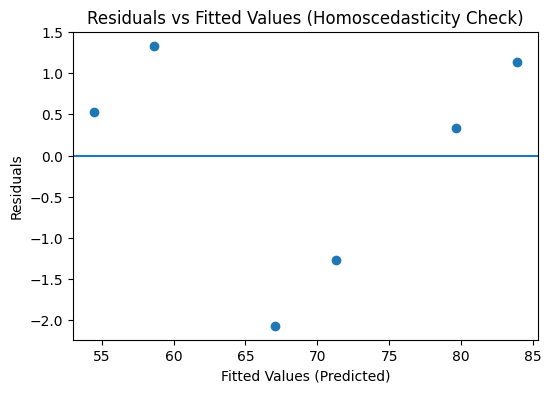

In [20]:
# 8. Homoscedasticity Check (Homoscedasticity Factor + Visualization)

import matplotlib.pyplot as plt
import numpy as np

# Sort residuals based on predicted (fitted) values
idx = np.argsort(df["Predicted"].values)
res_sorted = df["Residuals"].values[idx]
pred_sorted = df["Predicted"].values[idx]

# Split residuals into two halves
mid = len(res_sorted) // 2
res_low = res_sorted[:mid]
res_high = res_sorted[mid:]

# Variances
var_low = np.var(res_low, ddof=1)
var_high = np.var(res_high, ddof=1)

# Homoscedasticity Factor
HF = var_high / var_low

print(f"\nVariance (Low fitted values): {var_low:.4f}")
print(f"Variance (High fitted values): {var_high:.4f}")
print(f"Homoscedasticity Factor (HF): {HF:.4f}")

if HF < 2:
    print("No heteroscedasticity detected, homoscedasticity assumption holds.")
else:
    print("Heteroscedasticity detected, caution needed.")

# ---- Visualization ----
plt.figure(figsize=(6, 4))
plt.scatter(pred_sorted, res_sorted)
plt.axhline(0)
plt.xlabel("Fitted Values (Predicted)")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values (Homoscedasticity Check)")
plt.show()

Variance (Low fitted values) ≈ 3.16
Variance (High fitted values) ≈ 1.49
HF = 0.47
HF=0.47<2

No heteroscedasticity detected, Residual variance is reasonably constant, Homoscedasticity assumption is satisfied

There is no evidence of heteroscedasticity, as the homoscedasticity factor is less than 2. The homoscedasticity factor (HF = 0.47) indicates that the variance of residuals across low and high fitted values is stable. Hence, the homoscedasticity assumption of linear regression holds.


